In [ ]:
pip install xls

In [1]:
import pandas as pd

In [11]:
df=pd.read_excel("C:\\Users\\rajir\\Downloads\\Global Superstore.xls")

In [12]:
df.shape

(51290, 24)

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [14]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [15]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# values outside interquartile range(25% to 75%) is called outlier

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x27ea971ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x27eab237810>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ea971a110>],
 'medians': [<matplotlib.lines.Line2D at 0x27ea971d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ea971dd10>],
 'means': []}

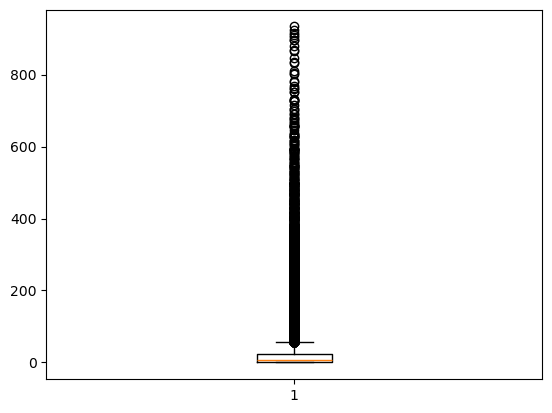

In [17]:
plt.boxplot(df["Shipping Cost"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a79fbe20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a80ba4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a79fbb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a80ba9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a80bac70>],
 'means': []}

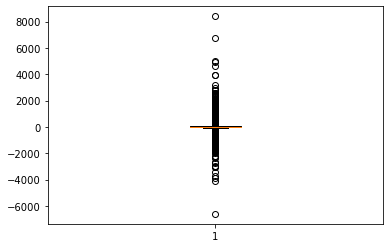

In [8]:
plt.boxplot(df["Profit"])

In [19]:
df["Profit"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     -30.5712
0.25       0.0000
0.50       9.2400
0.75      36.8100
1.00    8399.9760
Name: Profit, dtype: float64

In [20]:
df.shape

(51290, 24)

In [22]:
df_1=df[(df["Profit"] >=0.0) & (df["Profit"] <=36.8100)]

In [23]:
df_1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
18,22096,IN-2014-11763,2014-01-31,2014-02-01,First Class,JS-15685,Jim Sink,Corporate,Townsville,Queensland,...,TEC-CO-10000865,Technology,Copiers,"Brother Fax Machine, High-Speed",2565.594,9,0.1,28.4040,766.930,Critical
89,26669,IN-2013-69730,2013-12-12,2013-12-14,First Class,JM-15250,Janet Martin,Consumer,Suzhou,Anhui,...,TEC-CO-10003102,Technology,Copiers,"Canon Copy Machine, Color",1581.480,6,0.0,0.0000,550.740,High
99,18307,ES-2013-3903130,2013-09-03,2013-09-05,Second Class,MZ-17335,Maria Zettner,Home Office,Malakoff,Ile-de-France,...,OFF-AP-10002904,Office Supplies,Appliances,"Hamilton Beach Refrigerator, Silver",3155.544,7,0.1,34.9440,539.940,High
152,18899,ES-2011-1426891,2011-09-20,2011-09-22,Second Class,DB-13060,Dave Brooks,Consumer,Bochum,North Rhine-Westphalia,...,TEC-CO-10004365,Technology,Copiers,"HP Wireless Fax, Color",3616.500,10,0.0,36.0000,471.920,Critical
200,24361,IN-2013-48184,2013-06-10,2013-06-10,Same Day,NM-18445,Nathan Mautz,Home Office,Shenzhen,Guangdong,...,TEC-CO-10003819,Technology,Copiers,"Sharp Copy Machine, High-Speed",957.600,4,0.0,0.0000,427.100,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,24175,IN-2014-57662,2014-08-05,2014-08-10,Standard Class,DB-13270,Deborah Brumfield,Home Office,Townsville,Queensland,...,OFF-BI-10002424,Office Supplies,Binders,"Avery Binder, Economy",58.050,5,0.1,19.9500,0.010,Medium
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [24]:
df_1.shape

(25928, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x27eaa3dd390>,
 'caps': [<matplotlib.lines.Line2D at 0x27eaa3de7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27eaa3d0ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x27eaa3df910>],
 'fliers': [<matplotlib.lines.Line2D at 0x27eaa3e8250>],
 'means': []}

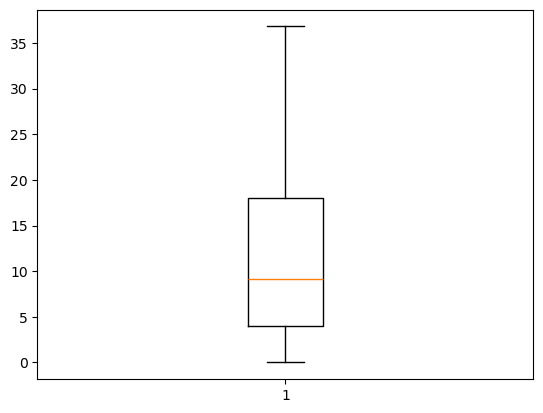

In [25]:
plt.boxplot(df_1["Profit"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27eaa42f210>,
 'caps': [<matplotlib.lines.Line2D at 0x27eaa43c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x27eaa42ea50>],
 'medians': [<matplotlib.lines.Line2D at 0x27eaa43d710>],
 'fliers': [<matplotlib.lines.Line2D at 0x27eaa43df90>],
 'means': []}

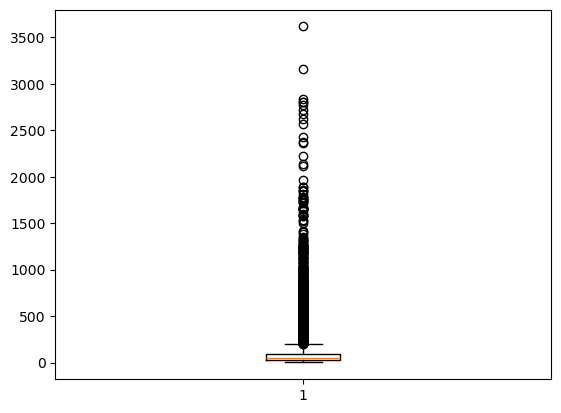

In [26]:
plt.boxplot(df_1["Sales"])

In [15]:
df_1["Sales"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10      12.54
0.25      23.64
0.50      48.78
0.75      96.18
1.00    3616.50
Name: Sales, dtype: float64

In [16]:
df_2=df_1[(df_1["Sales"] >=23.64) & (df_1["Sales"] <=96.18)]

In [17]:
df_2.shape

(12977, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a8769f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a8778520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a8769c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a8778ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a8778d90>],
 'means': []}

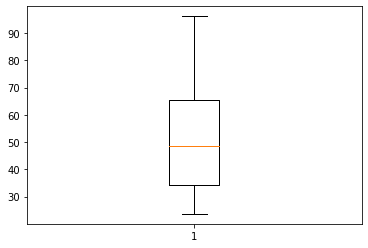

In [18]:
plt.boxplot(df_2["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a87d78e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a87d7eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a87d7610>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a87e7490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a87e7760>],
 'means': []}

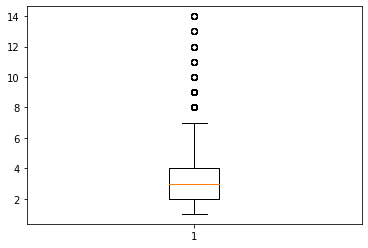

In [19]:
plt.boxplot(df_2["Quantity"])

In [20]:
df_2["Quantity"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    14.0
Name: Quantity, dtype: float64

In [21]:
df_3=df_2[(df_2["Quantity"] >=2.0) & (df_2["Quantity"] <=4.0)]

In [22]:
df_3.shape

(7906, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a883ee20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a8850400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a883eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a88509a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a8850c70>],
 'means': []}

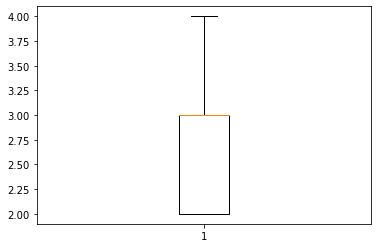

In [23]:
plt.boxplot(df_3["Quantity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a88b7400>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a88b79a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a88b7130>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a88b7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a88c3250>],
 'means': []}

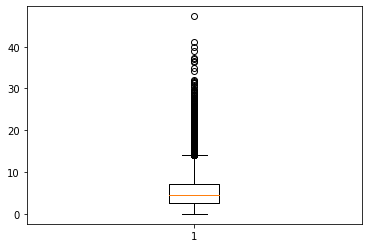

In [24]:
plt.boxplot(df_3["Shipping Cost"])

In [25]:
df_3["Shipping Cost"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.72000
0.25     2.70000
0.50     4.46100
0.75     7.23675
1.00    47.28000
Name: Shipping Cost, dtype: float64

In [26]:
df_4=df_3[(df_3["Shipping Cost"] >=2.70) & (df_3["Shipping Cost"] <=7.23675)]

In [27]:
df_4.shape

(3953, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3a8915790>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3a8915d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3a89154c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3a8922340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3a8922610>],
 'means': []}

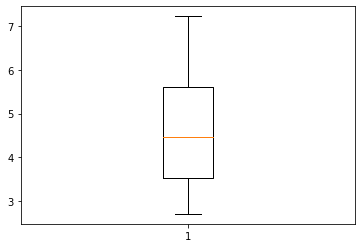

In [28]:
plt.boxplot(df_4["Shipping Cost"])

In [29]:
df_4.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
26583,10778,ES-2014-5617990,2014-09-11,2014-09-12,First Class,LW-16825,Laurel Workman,Corporate,Schiltigheim,Alsace,...,OFF-SU-10003160,Office Supplies,Supplies,"Acme Ruler, High Speed",33.420,2,0.0,1.320,7.23,High
26584,17129,ES-2014-3096832,2014-07-04,2014-07-09,Standard Class,BW-11065,Barry Weirich,Consumer,Catania,Sicily,...,OFF-AR-10002145,Office Supplies,Art,"Binney & Smith Sketch Pad, Fluorescent",95.160,2,0.0,4.740,7.23,Medium
26586,21231,IN-2012-45951,2012-11-02,2012-11-06,Standard Class,JG-15115,Jack Garza,Consumer,Bhopal,Madhya Pradesh,...,OFF-EN-10000315,Office Supplies,Envelopes,"Jiffy Business Envelopes, Security-Tint",47.880,3,0.0,9.090,7.23,High
26587,23945,IN-2012-40547,2012-11-29,2012-11-30,First Class,GT-14710,Greg Tran,Consumer,Adelaide,South Australia,...,OFF-BI-10004685,Office Supplies,Binders,"Acco Binder, Economy",40.905,3,0.1,9.495,7.23,High
26594,31408,CA-2013-128867,2013-11-04,2013-11-11,Standard Class,CL-12565,Clay Ludtke,Consumer,Urbandale,Iowa,...,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.788,7.23,Medium


1. boxplot => to identify outlier
2. outlier => simple and effective IQR technique

# Missing value imputations

In [30]:
df_4.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       3268
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
dtype: int64

In [31]:
df_4.drop(["Postal Code"],axis=1,inplace=True)

C:\Users\Lalith Eswar\AppData\Local\Temp\ipykernel_29036\3596599742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.drop(["Postal Code"],axis=1,inplace=True)


In [32]:
df_4.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [33]:
import numpy as np

In [34]:
df4_num=df_4.select_dtypes(include=[np.number])

In [35]:
df4_cat=df_4.select_dtypes(include=["object"])

In [36]:
df4_num.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [37]:
df4_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

# encoding, scaling

In [38]:
df4_num.drop(['Row ID'],axis=1,inplace=True)

In [39]:
from sklearn import preprocessing

In [40]:
le=preprocessing.LabelEncoder()

In [41]:
mm_scaler = preprocessing.MinMaxScaler()

In [42]:
df4_cat_e =df4_cat.apply(le.fit_transform)

In [43]:
df4_num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [44]:
df4_num_mm =mm_scaler.fit_transform(df4_num)

In [45]:
df4_num_mm_sc=pd.DataFrame(df4_num_mm)

In [46]:
df4_num_mm_sc.head()

,0,1,2,3,4
0,0.134822,0.0,0.0,0.035948,1.0
1,0.985939,0.0,0.0,0.129085,1.0
2,0.334160,0.5,0.0,0.247549,1.0
3,0.238007,0.5,0.2,0.258578,1.0
4,0.721257,0.0,0.0,0.620588,1.0


In [47]:
df4_cat_e.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
26583,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
26584,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
26586,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
26587,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
26594,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [48]:
d1=df4_cat_e.reset_index()

In [49]:
d1.head()

,index,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,26583,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
1,26584,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
2,26586,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
3,26587,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
4,26594,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [50]:
d1.drop(["index"],axis=1,inplace=True)

In [51]:
df_final=pd.concat([df4_num_mm_sc,d1],axis=1)

In [52]:
df_final.rename(columns={0:"Sales",1:"Quantity",2:"Discount",3:"Profit",4:"Shipping Cost"},inplace=True)

In [53]:
df_final.head()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,0.134822,0.0,0.0,0.035948,1.0,1476,0,706,447,1,1229,19,35,4,3,2160,1,14,79,1
1,0.985939,0.0,0.0,0.129085,1.0,1359,3,183,70,0,282,497,51,4,10,462,1,2,271,3
2,0.334160,0.5,0.0,0.247549,1.0,1773,3,544,337,0,176,319,46,0,4,923,1,6,739,1
3,0.238007,0.5,0.2,0.258578,1.0,1758,0,468,310,0,10,506,4,0,9,826,1,3,27,1
4,0.721257,0.0,0.0,0.620588,1.0,353,3,232,169,0,1390,246,105,6,3,352,1,2,697,3


In [54]:
df_final.isnull().sum()

Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

# modeling

In [55]:
from sklearn.tree import DecisionTreeRegressor #DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor#RandomForestClassifier

In [56]:
Linreg=LinearRegression()

In [57]:
Y=df_final["Sales"]

In [58]:
X=df_final.drop(["Sales"],axis=1)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [61]:
lm=Linreg.fit(X_train,y_train)

In [62]:
Linreg.score(X_train,y_train)

0.4635071002088049

In [63]:
dtr=DecisionTreeRegressor(criterion="mse")

In [64]:
#dtr=DecisionTreeRegressor(criterion="gini")

In [65]:
dt1=dtr.fit(X_train,y_train)

C:\Users\Lalith Eswar\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [66]:
dtr.score(X_train,y_train)

1.0

In [67]:
rf=RandomForestRegressor(n_estimators=100,random_state=50)

In [68]:
rf1=rf.fit(X_train,y_train)

In [69]:
rf.score(X_train,y_train)

0.9356208161053988

In [70]:
y_pre_rf = rf.predict(X_test)

In [71]:

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
mean_squared_error(y_test,y_pre_rf)

0.03031141231204717

In [73]:
mean_absolute_error(y_test,y_pre_rf)

0.13724533673577083

In [74]:
from math import sqrt

In [75]:
sqrt(mean_squared_error(y_test,y_pre_rf))

0.17410172977902078

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gb_r = GradientBoostingRegressor(n_estimators=600)

In [84]:
import xgboost as xg

!pip install xgboost

In [85]:
xgb_r = xg.XGBRegressor(n_estimators = 10)

In [87]:
gbr_model=gb_r.fit(X_train,y_train)

In [89]:
xgb_model=xgb_r.fit(X_train,y_train)

In [90]:
gb_r.score(X_train,y_train)

0.8690527772092067

In [91]:
xgb_r.score(X_train,y_train)

0.7474519230761958

In [93]:
from sklearn.ensemble import AdaBoostRegressor

In [94]:
ab_r=AdaBoostRegressor(n_estimators=100)

In [95]:
abr_model=ab_r.fit(X_train,y_train)

In [96]:
ab_r.score(X_train,y_train)

0.4723451318240136

In [97]:
!pip install xgboost